# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

In [1]:
import sys
!{sys.executable} -m pip install qmsolve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12080 sha256=94a2ceb4fa2d2f9608cef25138e84ab08f9400b78d2e7409ae44a3416ef24359
  Stored in directory: /root/.cache/pip/wheels/d7/d9/89/a3f31c76ff6d51dc3b1575628f59afe59e4ceae3f2748cd7ad
Successfully built progressbar


### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt>?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

1. A Hamiltonian is an operator that contains the total energy of a system (sum of kinetic and potential energy) in quantum mechanics. When applied to the Schrodinger Equation, the Hamiltonian operates on the wavefunction, and in the time-independent form, it produces energy eigenvalues (individual energy values). (http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hamil.html - "The Hamiltonian in Quantum Mechanics" - Georgia State University, "The Hamiltonian (quantum mechanics)" - Wikipedia)

2. The force law of the function in the harmonic oscillator, the potential energy = 1/2 kx^2, is Hooke's Law F = -kx.

3. In mathematics, when multiplying a vector by a matrix of eigenvalues, the vector will change in magnitude, but maintain its direction. Similarly, with the Schrodinger wave equation, the  eigenstate is the vector, while the Hamiltonian as the energy operator changes the eigenstate (vector) equally to the amount that a matrix of eigenvalues changes the eigenstate vector.  Each eigenstate will correspond to one eigenvalue, so a particle will have one distinct position and momentum, that is definite (instead of a probability), and corresponds to an eigenvalue.  Lastly, the eigenstate is a known state that the particle is in, which comes from a specific eigenvalue.  (https://physics.stackexchange.com/questions/485299/what-are-the-eigenstates-and-eigenvalues, https://en.wikipedia.org/wiki/Introduction_to_eigenstates#:~:text=The%20word%20%22eigenstate%22%20is%20derived,as%20position%2C%20momentum%2C%20etc.) In the code, it uses the Hamiltonian to calculate the eigenstate of a particle with known eigenvalue 30.

4. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

Computing...
Took 0.06018519401550293
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


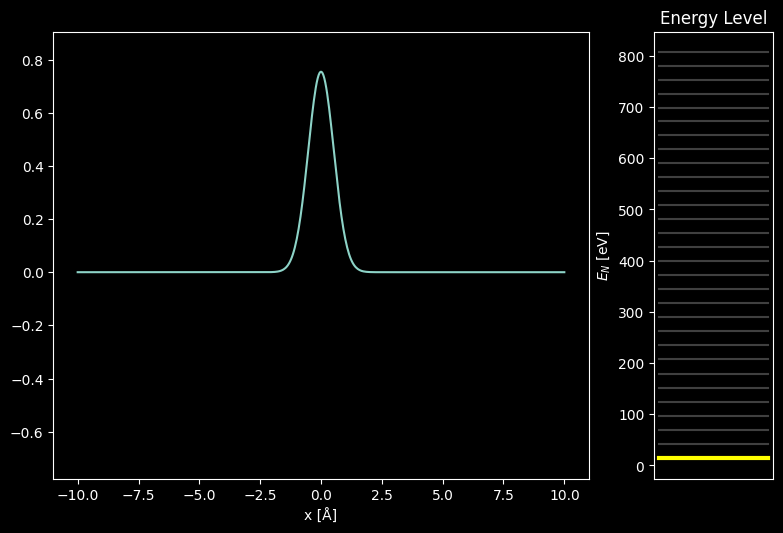

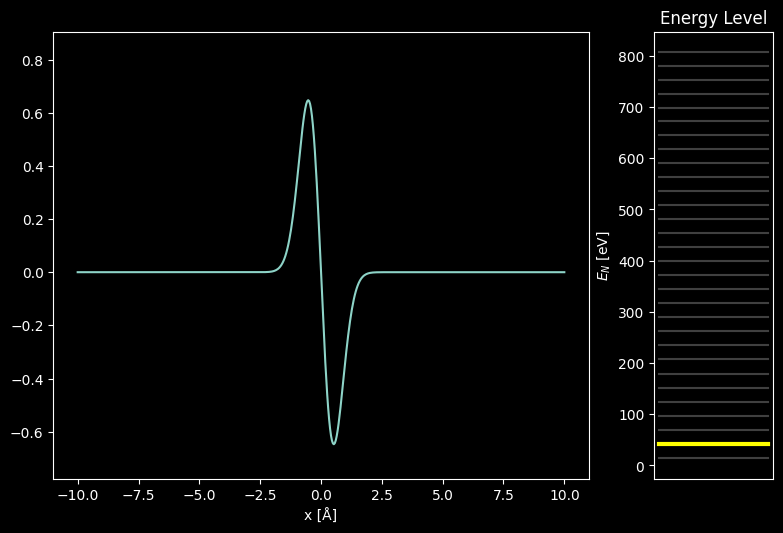

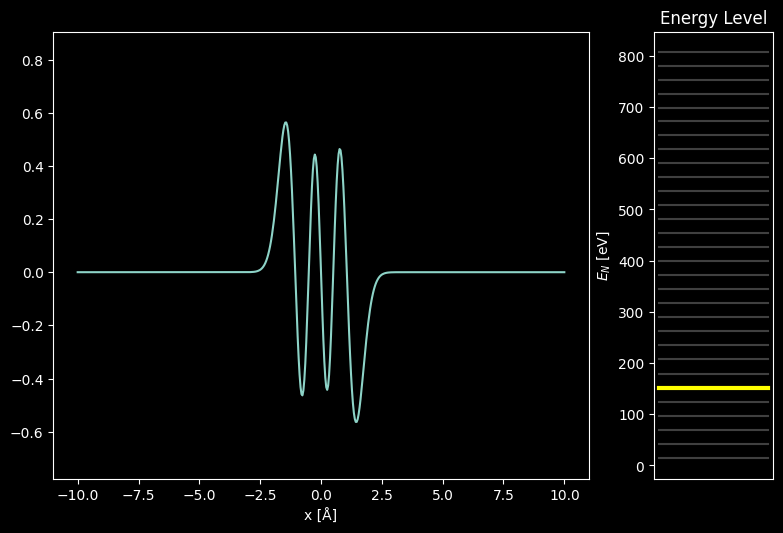

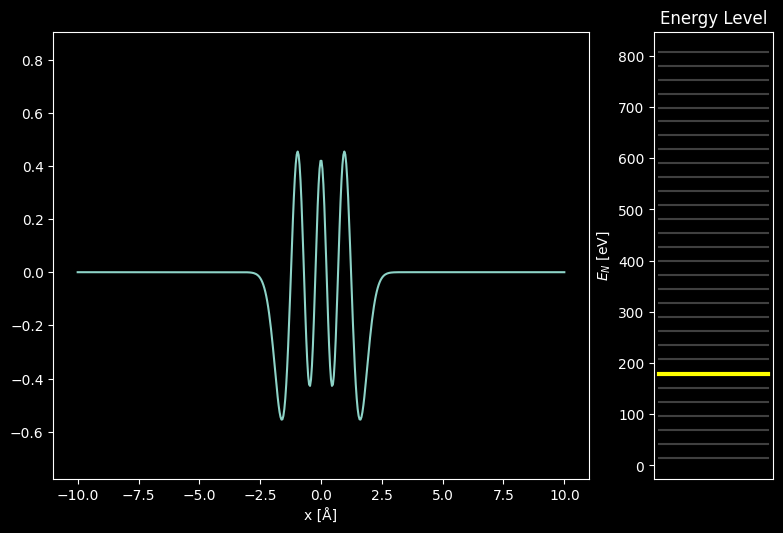

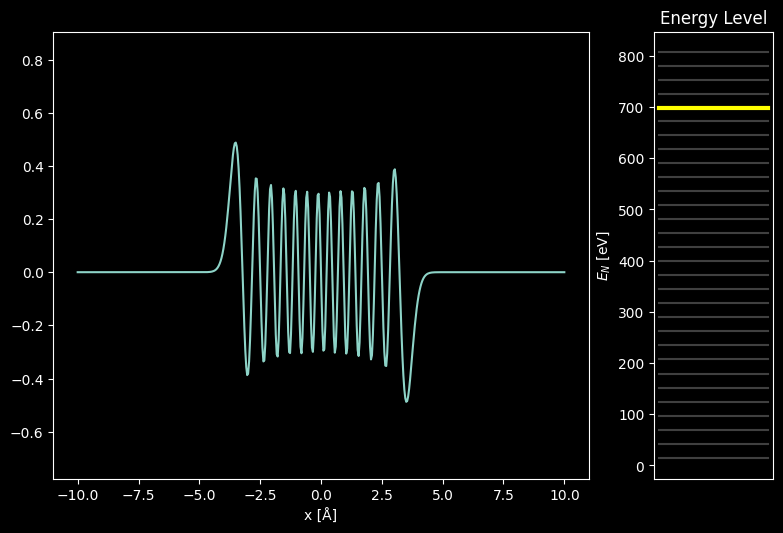

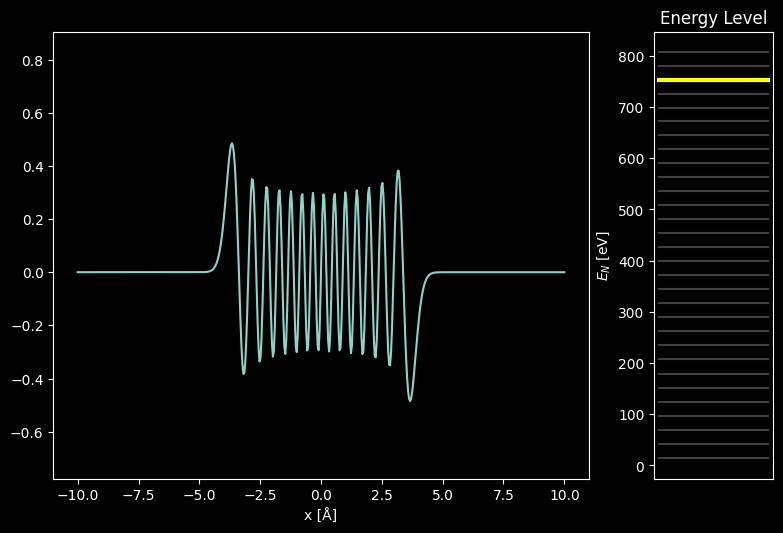

In [3]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)
visualization.plot_eigenstate(1)
visualization.plot_eigenstate(5)
visualization.plot_eigenstate(6)
visualization.plot_eigenstate(25)
visualization.plot_eigenstate(27)

5. What is on the x-axis of your plots?
6. Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?

5. The x-axis represents position of particle (a length) with units of Angstroms (unit of small lengths).

6. It is a wave function because there are values of position below the x axis, and in probability functions, the vertical bounds for the y axis are 0 to 1, so it cannot be a probability function since there are negative y values present.  Also, if you integrated this function, it would be 0, which is not possible for a probability function.

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

Computing...
Took 0.02167797088623047
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


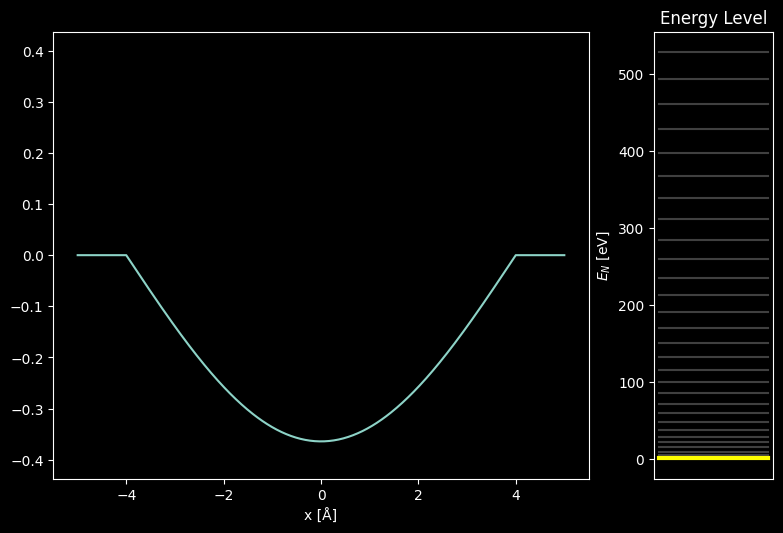

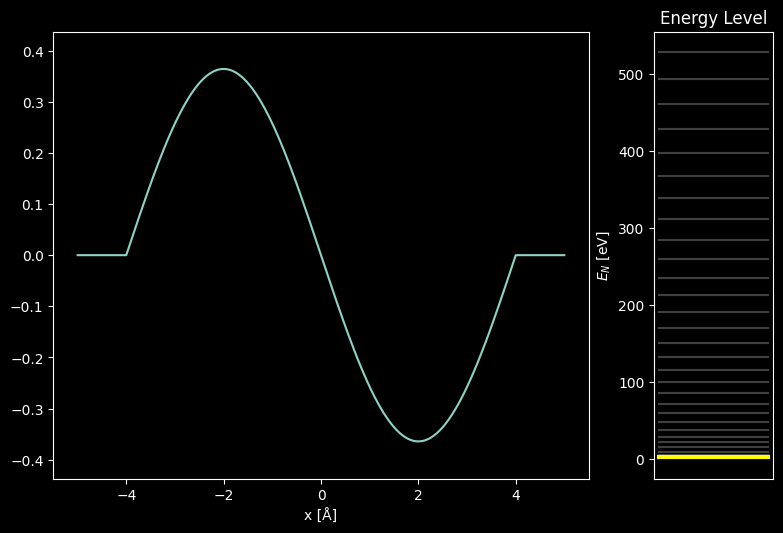

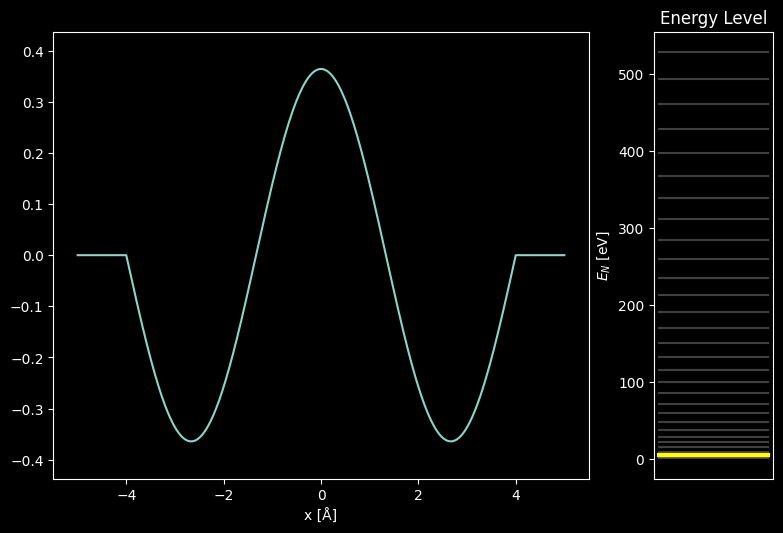

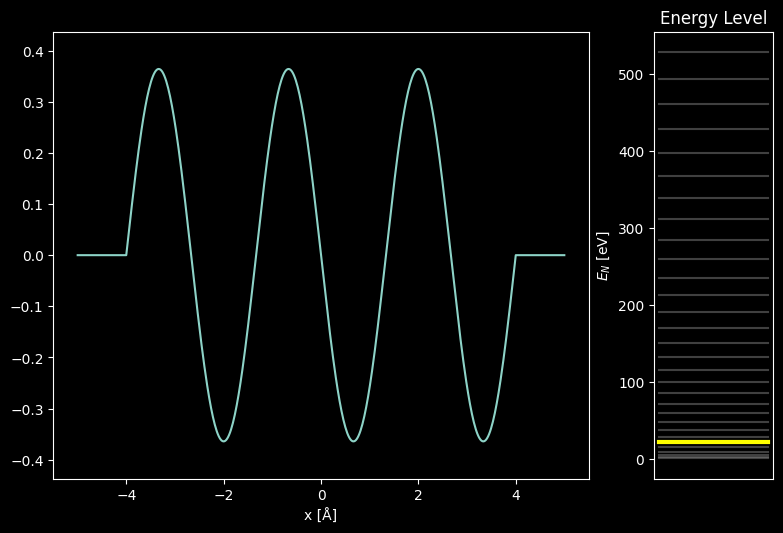

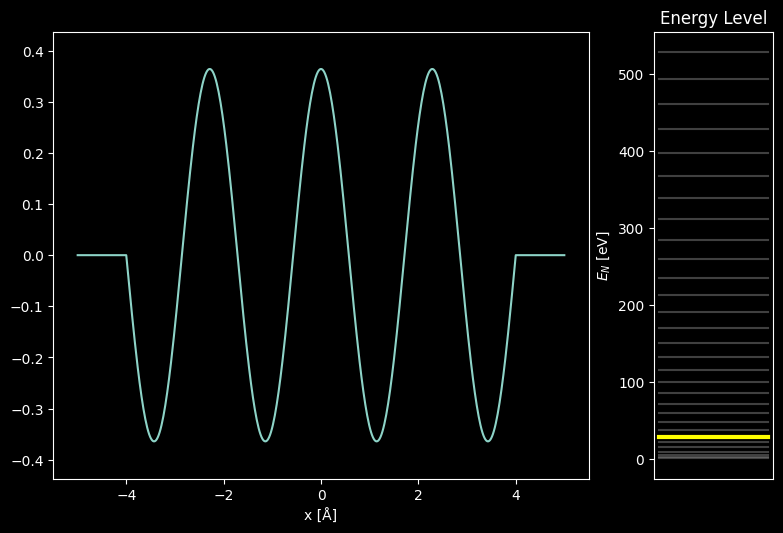

In [4]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

visualization_sw.plot_eigenstate(2)
visualization_sw.plot_eigenstate(5)
visualization_sw.plot_eigenstate(6)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class on 4/17)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

8. The particle in the infinite square well is known/finite, so the probability of it being in the infinite potential region is zero, (x cannot be less than/equal to 0 or greater than/equal to L).  This does not align with the first property of valid wave functions that states that waves functions should be continuous everywhere, because this wavefunction is not continuous where x is less than, greater than or equal to the absolute value of 4 Angstroms.  The SHO eigenstates have an unbounded range of probabilities.  

9. The quantum number = the number of extrema of the eigenstate - 1 (n is always one number less than the number of extrema).

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number n?</li>
</ol>

Computing...
Took 0.015786409378051758
[  0.44235895   1.76327431   3.94360662   6.94948097  10.73041302
  15.22020328  20.34649362  26.05500022  32.3423367   39.26978276
  46.93416144  55.41549188  64.74505094  74.90775839  85.86152239
  97.55723271 109.95486135 123.03518234 136.80482652 151.29172339
 166.53179218 182.55318186 199.36573675 216.9594022  235.31025728
 254.39048223 274.17856343 294.66661616 315.86239616 337.78512208]


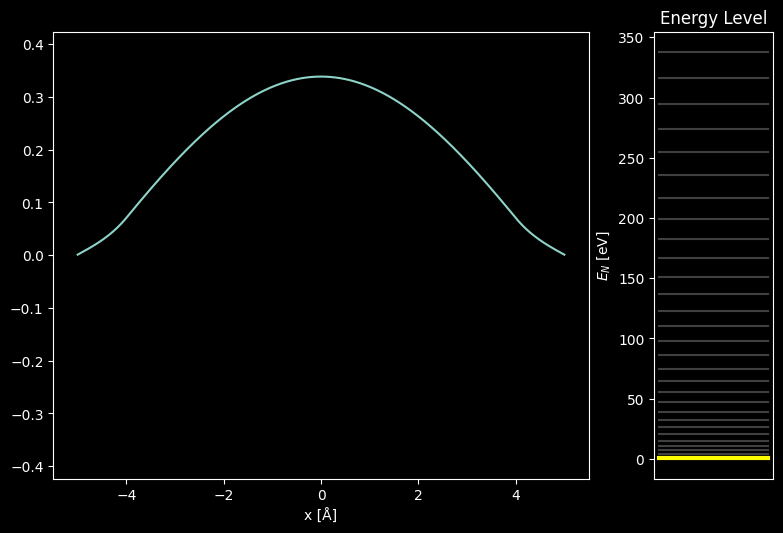

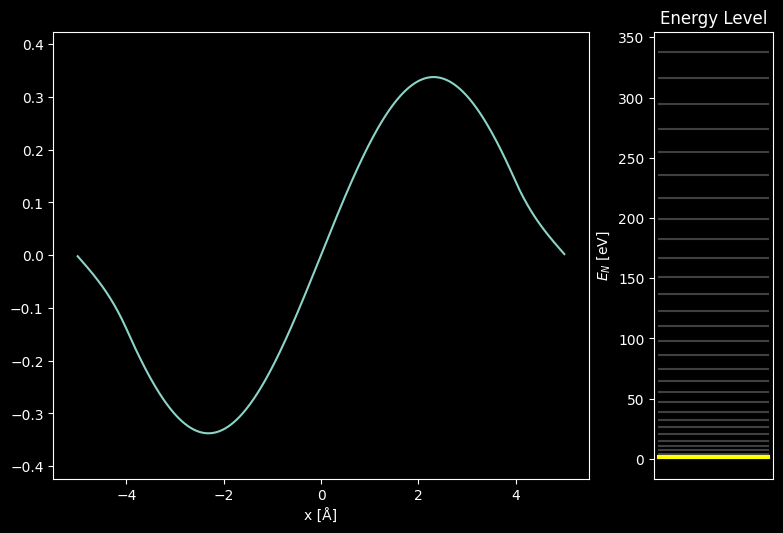

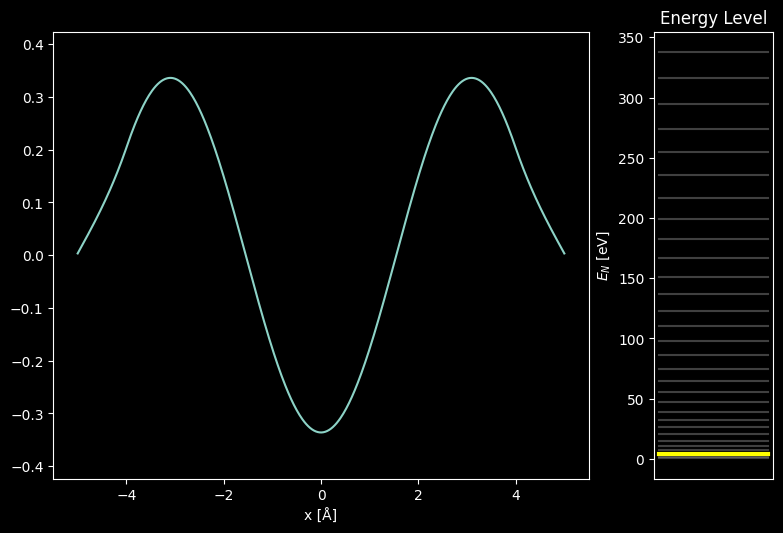

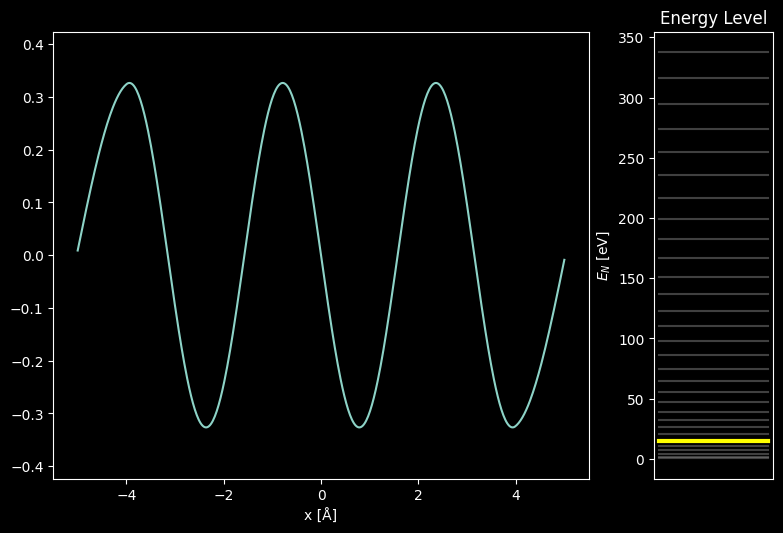

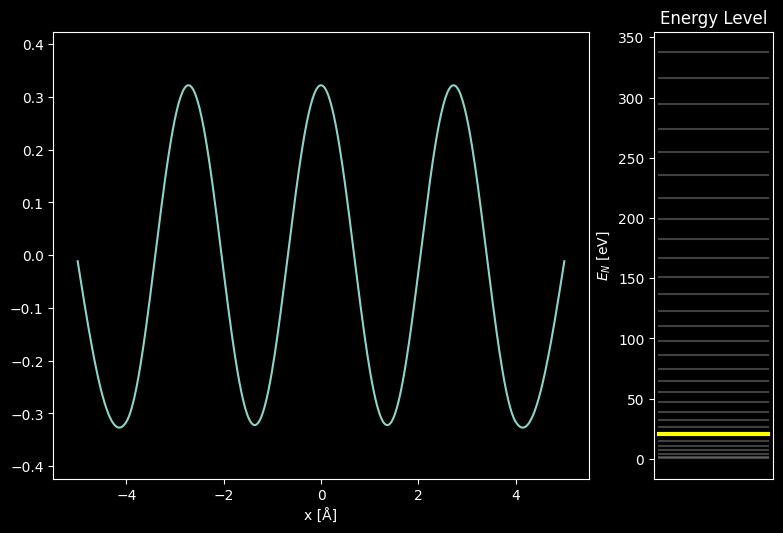

In [6]:
# 8 angstrom-wide finite square well
def finite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = 8*eV #a finite value for the potential "bounds"
    return potential

# Define the Hamiltonian of the finite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = finite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

visualization_sw.plot_eigenstate(2)
visualization_sw.plot_eigenstate(5)
visualization_sw.plot_eigenstate(6)

11. Yes, there will always be a small probability that the particle would be found outside of the "walls" of the finite square well.  Even for the ground state, n=0, there is still a probability associated with the particle being found outside of the walls.  